# 0.3_sklearn

In [2]:
from sklearn import datasets
import numpy as np

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris.data[:, [2, 3]]
y = iris.target

In [5]:
print('Class labels', np.unique(y))

Class labels [0 1 2]


In [6]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=1, stratify=y)

In [9]:
print("Label counts in y:", np.bincount(y))

Label counts in y: [50 50 50]


In [11]:
print("Label counts in y_trian:", np.bincount(y_train))

Label counts in y_trian: [35 35 35]


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()

In [14]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
X_train_std = sc.transform(X_train)

In [16]:
X_test_std = sc.transform(X_test)

In [17]:
from sklearn.linear_model import Perceptron

In [20]:
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)

In [21]:
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [22]:
y_pred = ppn.predict(X_test_std)

In [23]:
print('Misclassfied', (y_test != y_pred).sum())

Misclassfied 1


In [24]:
from sklearn.metrics import accuracy_score

In [25]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.98


In [26]:
ppn.score(X_test_std, y_test)

0.9777777777777777

In [31]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=.02):
    # setup marker generator and color map
    markers = list('sxo^v')
    colors = 'red blue lightgreen gray cyan'.split()
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution),
    )
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y==cl, 0],
            y=X[y==cl, 1],
            alpha=.8, 
            c = colors[idx],
            marker = markers[idx],
            label = cl,
            edgecolor='black'
        )
        
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(
            X_test[:, 0], X_test[:, 1],
            c='', edgecolor='black', alpha=1.0,
            linewidth=1, marker='o', 
            s=100, label='test set'
        )

In [28]:
X_combined_std = np.vstack((X_train_std, X_test_std))

In [29]:
y_combined = np.hstack((y_train, y_test))

/Users/shouta_shimizu/.local/share/virtualenvs/python-machine-learning-6hUrazaR/lib/python3.7/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


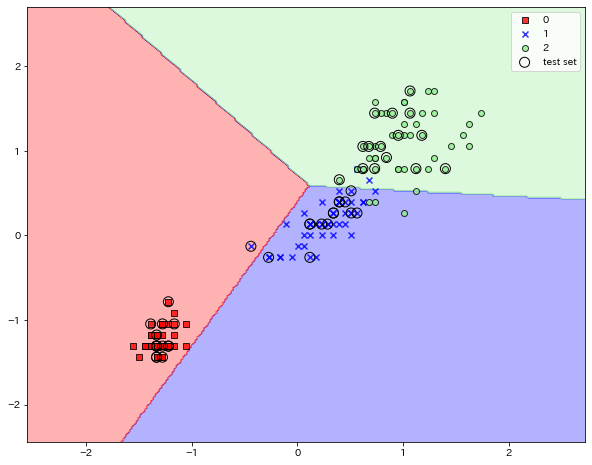

In [34]:
plt.figure(figsize=(10, 8))
plot_decision_regions(
    X = X_combined_std,
    y = y_combined,
    classifier=ppn,
    test_idx = range(105, 150)
)
plt.legend()

In [35]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [36]:
z = np.arange(-7, 7, .1)

In [37]:
phi_z = sigmoid(z)

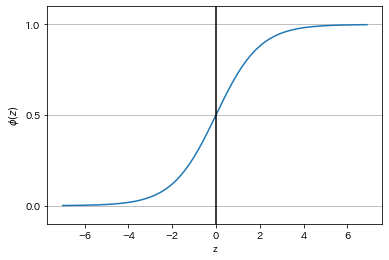

In [41]:
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

In [42]:
def cost_1(z):
    return -np.log(sigmoid(z))

In [43]:
def cost_0(z):
    return -np.log(1-sigmoid(z))

In [44]:
z = np.arange(-10, 10, .1)

In [45]:
phi_z = sigmoid(z)

In [46]:
c1 = [cost_1(x) for x in z]

In [48]:
c0 = [cost_0(x) for x in z]

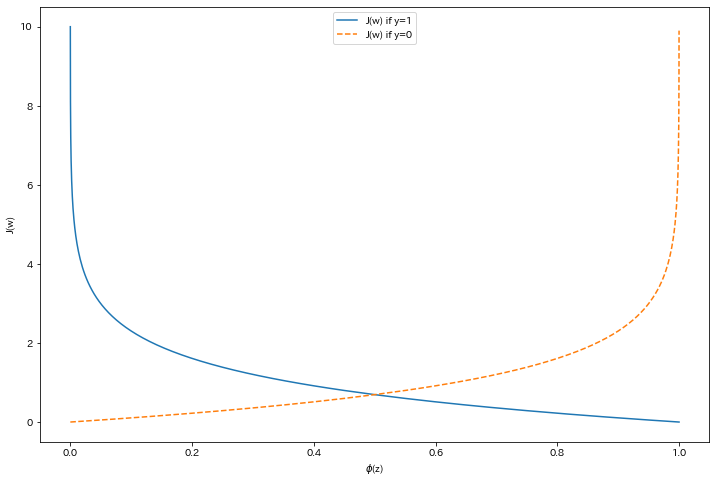

In [55]:
plt.figure(figsize=(12, 8))
plt.plot(phi_z, c1, label='J(w) if y=1')
plt.plot(phi_z, c0, label='J(w) if y=0', linestyle='--')
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')

plt.legend(loc='upper center')

In [57]:
X_train_01_subset = X_train[(y_train==0) | (y_train==1)]
y_train_01_subset = y_train[(y_train==0) | (y_train==1)]

In [58]:
from src.logisitc_regression_gd import LogisticRegressionGD

In [59]:
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)

In [60]:
lrgd.fit(X_train_01_subset, y_train_01_subset)

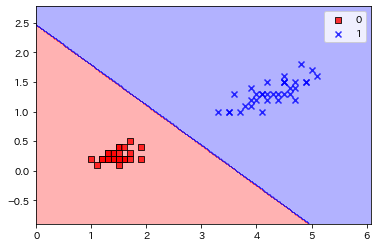

In [62]:
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.legend()

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
lr = LogisticRegression(C = 100.0, random_state=1)

In [65]:
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

/Users/shouta_shimizu/.local/share/virtualenvs/python-machine-learning-6hUrazaR/lib/python3.7/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


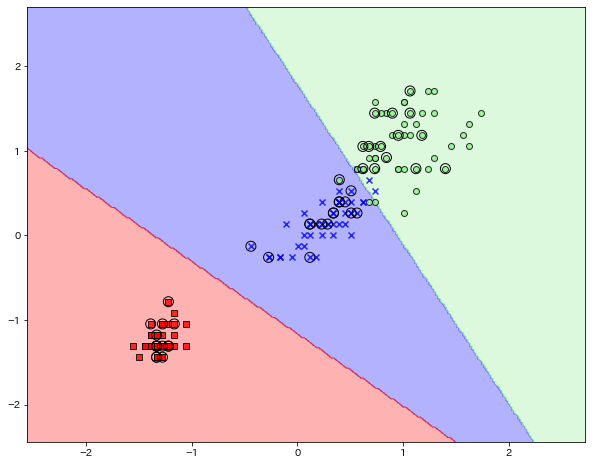

In [68]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))

In [69]:
lr.predict_proba(X_test_std[:3, :])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17]])

In [73]:
lr.predict_proba(X_test_std[:3, :]).sum(1)

array([1., 1., 1.])

In [75]:
lr.predict_proba(X_test_std[:3, :]).argmax(1)

array([2, 0, 0])

In [76]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [78]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

In [81]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)

Text(0.5, 0, 'C')

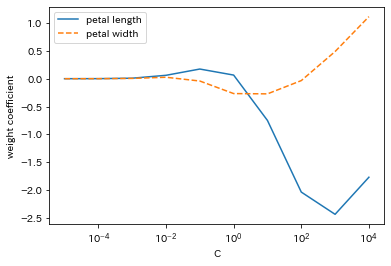

In [85]:
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], label='petal width', linestyle='--')
plt.legend()
plt.ylabel('weight coefficient')
plt.xscale('log')
plt.xlabel('C')

In [86]:
from sklearn.svm import SVC

In [87]:
svm = SVC(kernel='linear', C=1.0, random_state=1)

In [88]:
svm.fit(X_train_std, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

/Users/shouta_shimizu/.local/share/virtualenvs/python-machine-learning-6hUrazaR/lib/python3.7/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


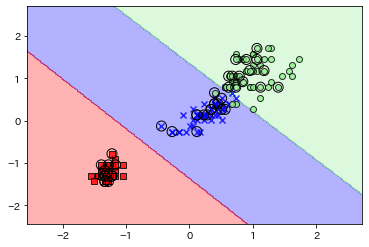

In [89]:
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))

In [90]:
from sklearn.linear_model import SGDClassifier

In [91]:
ppn = SGDClassifier(loss='perceptron')

In [92]:
lr = SGDClassifier(loss='log')

In [93]:
svm = SGDClassifier(loss='hinge')

# Kernels

In [94]:
X_xor = np.random.randn(200, 2)

In [96]:
y_xor = np.logical_xor(X_xor[:, 0]>0, X_xor[:, 1]>0)
y_xor = np.where(y_xor, 1, -1)

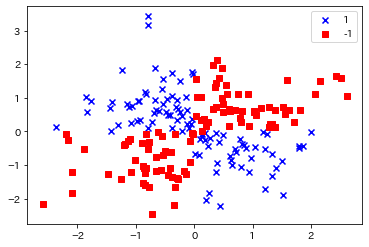

In [99]:
plt.scatter(
    X_xor[y_xor ==1, 0],
    X_xor[y_xor ==1, 1],
    c = 'b', marker='x', label='1'
)
plt.scatter(
    X_xor[y_xor ==-1, 0],
    X_xor[y_xor ==-1, 1],
    c = 'r', marker='s', label='-1'
)
plt.legend()

In [100]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)

In [101]:
svm.fit(X_xor, y_xor)

SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

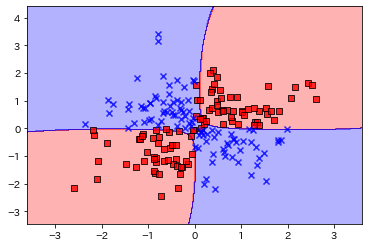

In [102]:
plot_decision_regions(X_xor, y_xor, classifier=svm)

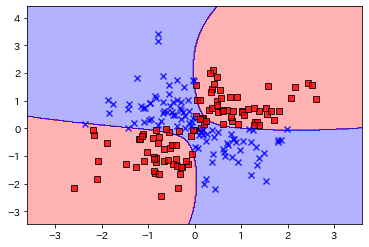

In [105]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.20, C=1.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)

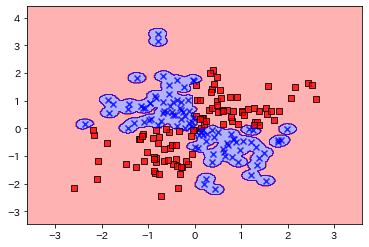

In [104]:
svm = SVC(kernel='rbf', random_state=1, gamma=100, C=1.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)

In [107]:
def gini(p):
    return p*(1-p) + (1-p)*(1-(1-p))
def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2(1-p)
def error(p):
    return 1- np.max([p, 1-p])

Text(0, 0.5, 'Impurity Index')

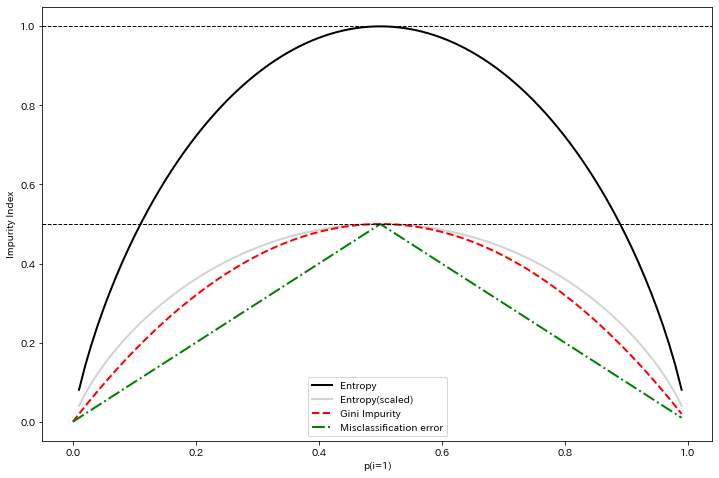

In [114]:
x = np.arange(0., 1., .01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
for i, lab, ls, c in zip(
    [ent, sc_ent, gini(x), err],
    ['Entropy', 'Entropy(scaled)', 'Gini Impurity', 'Misclassification error'],
    ['-', '-', '--', '-.'],
    ['black', 'lightgray', 'red', 'green', 'cyan']
):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
plt.legend()
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1, linewidth=1, color='k', linestyle='--')
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

In [117]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [119]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

/Users/shouta_shimizu/.local/share/virtualenvs/python-machine-learning-6hUrazaR/lib/python3.7/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


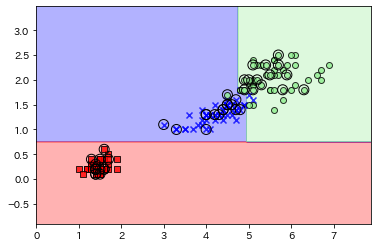

In [120]:
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))

In [122]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, filled=True, rounded=True, 
                           class_names=['Setosa', 'Veriscolor', 'Virginica'], feature_names=['petal length', 'petal width'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
forest = RandomForestClassifier()

In [126]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

/Users/shouta_shimizu/.local/share/virtualenvs/python-machine-learning-6hUrazaR/lib/python3.7/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


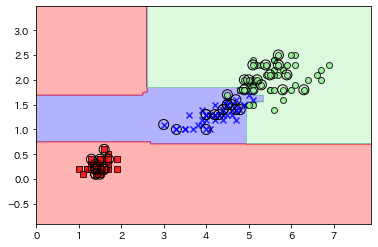

In [127]:
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))

In [129]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [130]:
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

/Users/shouta_shimizu/.local/share/virtualenvs/python-machine-learning-6hUrazaR/lib/python3.7/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


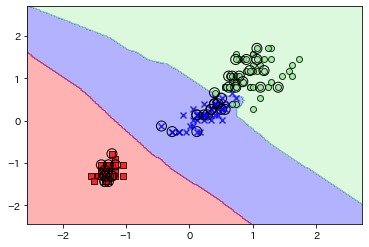

In [131]:
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))